In [ ]:
# Seaborn Cheat Sheet - Properties and Plots

## 📦 Import and Setup
```python
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set style and context
sns.set_style("whitegrid")  # whitegrid, darkgrid, white, dark, ticks
sns.set_context("notebook")  # paper, notebook, talk, poster
sns.set_palette("husl")     # Set color palette
```

## 🎨 Color Palettes
```python
# Qualitative palettes
sns.color_palette("husl", 8)
sns.color_palette("Set2")
sns.color_palette("tab10")

# Sequential palettes
sns.color_palette("Blues")
sns.color_palette("viridis")
sns.color_palette("rocket")

# Diverging palettes
sns.color_palette("RdBu")
sns.color_palette("coolwarm")
sns.color_palette("vlag")

# Custom palettes
sns.color_palette(["red", "green", "blue"])
```

## 📊 Distribution Plots

### Histogram & KDE
```python
# Histogram
sns.histplot(data=df, x="column", bins=30, kde=True)

# KDE plot
sns.kdeplot(data=df, x="column", shade=True)

# Distribution plot (deprecated, use histplot)
sns.distplot(df["column"])  # Legacy
```

### Box & Violin Plots
```python
# Box plot
sns.boxplot(data=df, x="category", y="value")

# Violin plot
sns.violinplot(data=df, x="category", y="value")

# Strip plot
sns.stripplot(data=df, x="category", y="value", jitter=True)

# Swarm plot
sns.swarmplot(data=df, x="category", y="value")
```

## 📈 Relational Plots

### Scatter Plots
```python
# Basic scatter
sns.scatterplot(data=df, x="x_col", y="y_col")

# With hue and size
sns.scatterplot(data=df, x="x_col", y="y_col",
                hue="category", size="size_col")

# Regression plot
sns.regplot(data=df, x="x_col", y="y_col")

# LM plot with categories
sns.lmplot(data=df, x="x_col", y="y_col", hue="category")
```

### Line Plots
```python
# Line plot
sns.lineplot(data=df, x="x_col", y="y_col")

# Multiple lines with hue
sns.lineplot(data=df, x="x_col", y="y_col", hue="category")

# With confidence intervals
sns.lineplot(data=df, x="x_col", y="y_col", ci=95)
```

## 📋 Categorical Plots

### Bar Plots
```python
# Count plot
sns.countplot(data=df, x="category")

# Bar plot (with aggregation)
sns.barplot(data=df, x="category", y="value", estimator=np.mean)

# Point plot
sns.pointplot(data=df, x="category", y="value")
```

### Category Comparisons
```python
# Cat plot (figure-level)
sns.catplot(data=df, x="cat1", y="value", hue="cat2", kind="bar")

# Factor plot (deprecated, use catplot)
sns.factorplot()  # Legacy
```

## 🔥 Heatmaps & Matrix Plots

### Heatmap
```python
# Correlation heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)

# Custom heatmap
sns.heatmap(data=df.pivot_table(index="row", columns="col", values="val"),
            annot=True, fmt=".2f", cmap="Blues")
```

### Cluster Map
```python
# Hierarchical clustering heatmap
sns.clustermap(df.corr(), annot=True, cmap="coolwarm")
```

## 🎯 Figure-Level vs Axes-Level Functions

### Figure-Level (return FacetGrid)
```python
# Can create subplots automatically
sns.relplot(data=df, x="x", y="y", col="category", kind="scatter")
sns.displot(data=df, x="value", col="category", kind="hist")
sns.catplot(data=df, x="cat", y="val", col="group", kind="box")
```

### Axes-Level (return matplotlib Axes)
```python
# Work with existing matplotlib figures
fig, ax = plt.subplots()
sns.scatterplot(data=df, x="x", y="y", ax=ax)
sns.histplot(data=df, x="value", ax=ax)
sns.boxplot(data=df, x="cat", y="val", ax=ax)
```

## 🎛️ Common Parameters

### Universal Parameters
```python
# Data and aesthetics
data=df                    # DataFrame
x="column_name"           # X-axis variable
y="column_name"           # Y-axis variable
hue="category"            # Color encoding
size="size_variable"      # Size encoding
style="style_variable"    # Style encoding (line/marker style)

# Appearance
palette="viridis"         # Color palette
alpha=0.7                 # Transparency
```

### Plot-Specific Parameters
```python
# For distribution plots
bins=30                   # Number of bins (histplot)
kde=True                  # Add KDE overlay
stat="density"            # Statistic to compute

# For regression plots
ci=95                     # Confidence interval
order=2                   # Polynomial order
robust=True               # Robust regression

# For categorical plots
estimator=np.mean         # Aggregation function
ci="sd"                   # Error bar type
dodge=True                # Separate categories
```

## 🔧 Customization

### Styling
```python
# Set figure size
plt.figure(figsize=(10, 6))

# Rotate labels
plt.xticks(rotation=45)

# Add title and labels
plt.title("Plot Title")
plt.xlabel("X Label")
plt.ylabel("Y Label")

# Remove spines
sns.despine()

# Set limits
plt.xlim(0, 100)
plt.ylim(0, 50)
```

### Subplots with FacetGrid
```python
# Create subplots by category
g = sns.FacetGrid(df, col="category", row="group")
g.map(sns.scatterplot, "x", "y")
g.add_legend()

# With figure-level functions
sns.relplot(data=df, x="x", y="y",
           col="cat1", row="cat2", kind="scatter")
```

## 📊 Quick Plot Reference

| Plot Type | Function | Use Case |
|-----------|----------|----------|
| **Distribution| `histplot()` | Single variable distribution |
| | `kdeplot()` | Smooth distribution curve |
| | `boxplot()` | Distribution summary with outliers |
| | violinplot()| Distribution shape + summary stats |
| **Relational**| `scatterplot()` | Relationship between variables |
| | `lineplot()`| Trends over time/continuous var |
| | `regplot()` | Linear relationship with regression |
| **Categorical*| `countplot()` | Count of categories |
| | `barplot()` | Aggregated values by category |
| | `pointplot()| Point estimates with error bars |
| **Matrix**    | `heatmap()` | 2D data representation |
| |clustermap()`| Hierarchical clustering heatmap |

## 🔥 Pro Tips

### Data Preparation
```python
# Melt data for seaborn
df_melted = df.melt(id_vars=["id"], value_vars=["col1", "col2"])

# Load built-in datasets
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")
flights = sns.load_dataset("flights")
```

### Advanced Techniques
```python
# Pair plots for multiple variables
sns.pairplot(df, hue="category")

# Joint plot (bivariate + marginals)
sns.jointplot(data=df, x="x", y="y", kind="reg")

# Faceted histograms
sns.displot(data=df, x="value", col="category", bins=20)

# Multiple plot types
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.scatterplot(data=df, x="x", y="y", ax=axes[0,0])
sns.boxplot(data=df, x="cat", y="val", ax=axes[0,1])
sns.histplot(data=df, x="value", ax=axes[1,0])
sns.heatmap(df.corr(), ax=axes[1,1])
plt.tight_layout()
```

### Color and Style Control
```python
# Set specific colors
colors = ["red", "blue", "green"]
sns.barplot(data=df, x="cat", y="val", palette=colors)

# Custom color mapping
color_map = {"A": "red", "B": "blue", "C": "green"}
sns.scatterplot(data=df, x="x", y="y", hue="category", palette=color_map)

# Adjust legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
```

## 🚀 Quick Examples

### Basic Workflow
```python
# 1. Load and explore data
df = sns.load_dataset("tips")
print(df.head())
print(df.info())

# 2. Create plots
sns.scatterplot(data=df, x="total_bill", y="tip", hue="time")
plt.title("Tips vs Total Bill by Time of Day")
plt.show()

# 3. Save figure
plt.savefig("tips_plot.png", dpi=300, bbox_inches="tight")
```

### Multi-plot Dashboard
```python
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.histplot(data=df, x="total_bill", ax=axes[0,0])
sns.boxplot(data=df, x="day", y="total_bill", ax=axes[0,1])
sns.scatterplot(data=df, x="total_bill", y="tip", hue="time", ax=axes[1,0])
sns.heatmap(df.select_dtypes(include=[np.number]).corr(),
            annot=True, ax=axes[1,1])

plt.tight_layout()
plt.show()
```

/tmp/ipython-input-1265143357.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d, kde=True, hist=True, bins=10,


<Axes: ylabel='Density'>

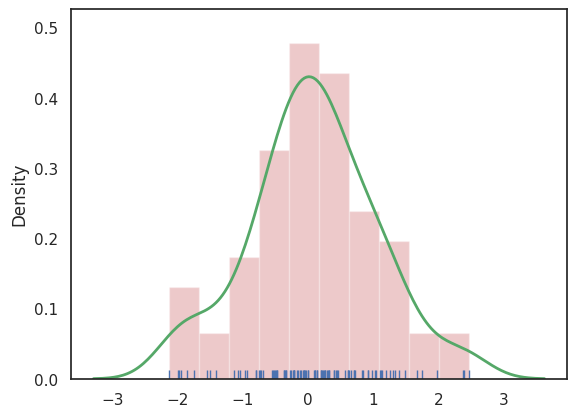

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="white")

# Generate a random univariate dataset
rs = np.random.RandomState(10)
d = rs.normal(size=100)

# Define the colors to use
colors = ["r", "g", "b"]

# Plot a histogram with multiple colors
sns.distplot(d, kde=True, hist=True, bins=10,
             rug=True,hist_kws={"alpha": 0.3,
                                "color": colors[0]},
             kde_kws={"color": colors[1], "lw": 2},
             rug_kws={"color": colors[2]})

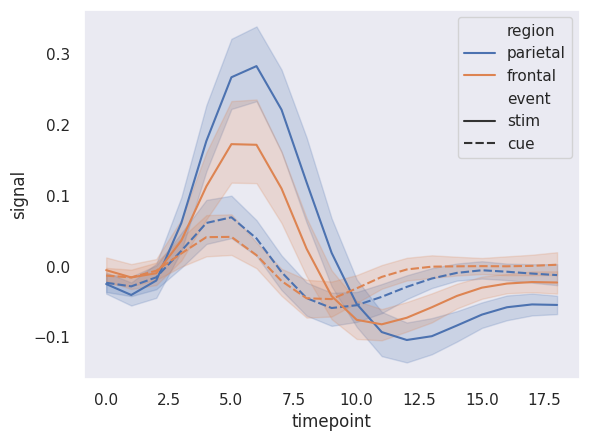

In [4]:
sns.set(style="dark")
fmri = sns.load_dataset("fmri")

# Plot the responses for different\
# events and regions
sns.lineplot(x="timepoint",
             y="signal",
             hue="region",
             style="event",
             data=fmri)
plt.show()